In [1]:
%matplotlib inline
import numpy as np
import astropy
from astropy.io import ascii
from astropy.table import Table
from astropy.io import fits
import cosmo
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Column

This notebook matches galaxies from various surveys to the DEIMOS survey for a more comprehensive data catalogue.

All data tables come from "galaxy_inputs" folder.

In [2]:
#DEIMOS catalogue
F = np.genfromtxt('galaxy_inputs/cosmos_example_hostlib.txt', skip_header = 1)
names = ['IGNORE','GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZERR', 'ZPHOT', 'ZPHOTERR', 'logsfr', 'logmass', 'logssfr', 'hstj_obs',  'hsth_obs', 'n0_Sersic', 'a0_Sersic', 'b0_Sersic', 'a_rot', 'eazy_coeff00', 'eazy_coeff01', 'eazy_coeff02', 'eazy_coeff03', 'eazy_coeff04', 'eazy_coeff05', 'eazy_coeff06', 'eazy_coeff07', 'eazy_coeff08', 'eazy_coeff09', 'eazy_coeff10', 'eazy_coeff11', 'eazy_coeff12']
T = Table(names = ('IGNORE','GALID', 'RA_GAL', 'DEC_GAL', 'ZTRUE', 'ZERR', 'ZPHOT', 'ZPHOTERR', 'logsfr', 'logmass', 'logssfr', 'hstj_obs',  'hsth_obs', 'n0_Sersic', 'a0_Sersic', 'b0_Sersic', 'a_rot', 'eazy_coeff00', 'eazy_coeff01', 'eazy_coeff02', 'eazy_coeff03', 'eazy_coeff04', 'eazy_coeff05', 'eazy_coeff06', 'eazy_coeff07', 'eazy_coeff08', 'eazy_coeff09', 'eazy_coeff10', 'eazy_coeff11', 'eazy_coeff12'))
for row in F:
    T.add_row(row)
    
r = list(T[1])
for x in range (0, len(r)):
    if isinstance(r[x], str)==True:
        T.remove_column(names[x])
T.remove_column("IGNORE")

In [3]:
#G10 catalogue
F_2 = fits.open("galaxy_inputs/G10CosmosCatv05/G10COSMOSCatv05.fits")
T_2 = Table.read(F_2)
add1 = T_2['filename_ZCOS']
add2 = T_2['SPEC_FILENAME']
names = list(T_2.columns)
r = list(T_2[1])
for x in range (0, len(r)):
    if isinstance(r[x], str)==True:
        T_2.remove_column(names[x])
T_2["Z_06"] = (-1)*(cosmo.zfromt(T_2["Z_06"]))

/Users/leahvazsonyi/astronomy/Galaxylib/cosmo.py:192: RuntimeWarning: overflow encountered in sinh
  z = ( A * sinh( B ) )**(-2/3.) - 1


In [4]:
#matching coordinates
c = SkyCoord(ra=T["RA_GAL"]*u.degree, dec=T["DEC_GAL"]*u.degree, distance = T["ZTRUE"])
catalog = SkyCoord(ra=T_2["RA_06"]*u.degree, dec=T_2["DEC_06"]*u.degree, distance = T_2["Z_06"])
idx, d2d, d3d = c.match_to_catalog_3d(catalog)

In [5]:
matches = catalog[idx]
matches_i = []
T_2_match = T_2[idx]
ids = []
#confirming that all matches are within 1 arcsec of the original catalogue galaxy
for a in range (0, len(T["RA_GAL"])):
    x = T["RA_GAL"][a]
    y = T_2_match["RA_06"][a]
    if x-y <= 0.000278:
        w = T["DEC_GAL"][a]
        z = T_2_match["DEC_06"][a]
        if w-z <= 0.000278:
            matches_i.append(idx[a])
            ids.append(T["GALID"][a])
T_2_m = T_2[matches_i] #Table of galaxies from G10 catalogue which match DEIMOS catalogue
add1_m = add1[matches_i]
add2_m = add2[matches_i]
g = Column(ids, name = "GALID2")
T_2_m.add_column(g)


In [6]:
#vUDS catalogue
F_3 = ascii.read("galaxy_inputs/cesam_vuds_spectra_dr1_cosmos_catalog_1566516152.csv")

T_3 = Table(F_3)
names = list(T_3.columns)
r = list(T_3[1])
for x in range (0, len(r)):
    if isinstance(r[x], str)==True:
        T_3.remove_column(names[x])

In [7]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=T["RA_GAL"]*u.degree, dec=T["DEC_GAL"]*u.degree, distance = T["ZTRUE"])
catalog = SkyCoord(ra=T_3["alpha"]*u.degree, dec=T_3["delta"]*u.degree, distance = T_3["z_spec"])
idx, d2d, d3d = c.match_to_catalog_3d(catalog)

In [8]:
matches1 = catalog[idx]

T_3_match = T_3[idx]
ids = []
matches_i = []
for a in range (0, len(T["RA_GAL"])):
    x = T["RA_GAL"][a]
    y = T_3_match["alpha"][a]
    if x-y <= 0.000278:
        w = T["DEC_GAL"][a]
        z = T_3_match["delta"][a]
        if w-z <= 0.000278:
            matches_i.append(idx[a])
            ids.append(T["GALID"][a])
T_3_m = T_3[matches_i]
f = Column(ids, name = "GALID3")
T_3_m.add_column(f)

In [9]:
#zCosmos Catalogue
F_4 = fits.open("galaxy_inputs/zCOSMOS_VIMOS_BRIGHT_DR3_CATALOGUE.fits")
T_4 = Table.read(F_4)
names = list(T_4.columns)
r = list(T_4[1])
for x in range (0, len(r)):
    if isinstance(r[x], str)==True:
        T_4.remove_column(names[x])

In [10]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=T["RA_GAL"]*u.degree, dec=T["DEC_GAL"]*u.degree, distance = T["ZTRUE"])
catalog = SkyCoord(ra=T_4["RAJ2000"], dec=T_4["DEJ2000"], distance = T_4["REDSHIFT"])
idx, d2d, d3d = c.match_to_catalog_3d(catalog)

In [11]:
matches1 = catalog[idx]

T_4_match = T_4[idx]
ids = []
matches_i = []
for a in range (0, len(T["RA_GAL"])):
    x = T["RA_GAL"][a]
    y = T_4_match["RAJ2000"][a]
    if x-y <= 0.000278:
        w = T["DEC_GAL"][a]
        z = T_4_match["DEJ2000"][a]
        if w-z <= 0.000278:
            matches_i.append(idx[a])
            ids.append(T["GALID"][a])
T_4_m = T_4[matches_i]
h = Column(ids, name = "GALID4")
T_4_m.add_column(h)


In [12]:

'''Builds final catalogue by combining all of the matched tables into one larger table.
If there is no data for a specific cell, it will be filled with a 0'''
names = (list(T.columns) + list(T_2_m.columns) + list(T_3_m.columns) + list(T_4_m.columns))

T_final = Table(names = (list(T.columns) + list(T_2_m.columns) + list(T_3_m.columns) + list(T_4_m.columns)))
row1 = []
row2 = []
for x in range(0, len(T["GALID"])):
    ID = T["GALID"][x]
    r1 = list(T[x])
    if ID in T_2_m["GALID2"]:
        l = list(T_2_m["GALID2"])
        ind = l.index(ID)
        r2 = list(T_2_m[ind])
        row1.append(add1_m[ind])
        row2.append(add2_m[ind])
    else:
        y = len(list(T_2_m[1]))
        r2 = list(y*"0")
        row1.append(0)
        row2.append(0)
    if ID in T_3_m["GALID3"]:
        l = list(T_3_m["GALID3"])
        ind = l.index(ID)
        r3 = list(T_3_m[ind])
    else:
        y = len(list(T_3_m[1]))
        r3 = list(y*"0")
    if ID in T_4_m["GALID4"]:
        l = list(T_4_m["GALID4"])
        ind = l.index(ID)
        r4 = list(T_4_m[ind])
    else:
        y = len(list(T_4[1]))+1
        r4 = list(y*"0")
    row = np.array(r1 + r2 + r3 + r4, dtype = object)
    T_final.add_row(row)

row1f = Column(row1, name = 'filename_ZCOS')
row2f = Column(row2, name = 'SPEC_FILENAME')
T_final.write("gal_lib_mod.fits", format = "fits")

OSError: File exists: gal_lib_mod.fits

In [14]:
'''Matches from HST catalogue'''
F = np.genfromtxt('galaxy_inputs/3dhst_master.phot.v4.1.cat', skip_header = 41202)
T_HST = Table(names = ('id', 'field', 'ra', 'dec', 'x', 'y', 'z_spec', 'z_peak', 'faper_F140W', 'eaper_F140W', 'faper_F160W', 'eaper_F160W', 'f_F606W', 'e_F606W', 'f_F814W', 'e_F814W', 'f_F125W', 'e_F125W', 'f_F140W', 'e_F140W', 'f_F160W', 'e_F160W', 'tot_cor', 'kron_radius', 'a_image', 'b_image', 'flux_radius', 'fwhm_image', 'flags', 'f140w_flag', 'star_flag', 'use_phot', 'near_star', 'nexp_f125w', 'nexp_f140w', 'nexp_f160w', 'lmass', 'Av'))
count = 0
for row in F:
    T_HST.add_row(row)
    count = count + 1
    if count > 33882:
        break

In [15]:
T_HST_tot = Table(names = ("GALID", "RA_GAL", "DEC_GAL", "ZTRUE"))

In [16]:
#cosmos-02
T_HST_tot.add_row([T_final[16]["GALID"], T_final[16]["RA_GAL"], T_final[16]["DEC_GAL"], T_final[16]["ZTRUE"]])
T_HST_tot.add_row([T_final[19]["GALID"], T_final[19]["RA_GAL"], T_final[19]["DEC_GAL"], T_final[19]["ZTRUE"]])
T_HST_tot.add_row([T_final[18]["GALID"], T_final[18]["RA_GAL"], T_final[18]["DEC_GAL"], T_final[18]["ZTRUE"]])
names = Column(data =["cosmos-02", "cosmos-02", "cosmos-02"], name = ("FOLDER"))
T_HST_tot.add_column(names)


In [17]:
#cosmos-03
T_HST_tot.add_row([T_final[1]["GALID"], T_final[1]["RA_GAL"], T_final[1]["DEC_GAL"], T_final[1]["ZTRUE"], "cosmos-03"])

In [18]:
#cosmos-04
T_HST_tot.add_row([T_final[28]["GALID"], T_final[28]["RA_GAL"], T_final[28]["DEC_GAL"], T_final[28]["ZTRUE"], "cosmos-04"])

In [19]:
#cosmos-06
T_HST_tot.add_row([T_final[6]["GALID"], T_final[6]["RA_GAL"], T_final[6]["DEC_GAL"], T_final[6]["ZTRUE"], "cosmos-06"])

In [20]:
#cosmos-07
T_HST_tot.add_row([T_final[4]["GALID"], T_final[4]["RA_GAL"], T_final[4]["DEC_GAL"], T_final[4]["ZTRUE"], "cosmos-07"])

In [21]:
#cosmos-11
T_HST_tot.add_row([T_final[17]["GALID"], T_final[17]["RA_GAL"], T_final[17]["DEC_GAL"], T_final[17]["ZTRUE"], "cosmos-11"])

In [22]:
#cosmos-12
T_HST_tot.add_row([T_final[9]["GALID"], T_final[9]["RA_GAL"], T_final[9]["DEC_GAL"], T_final[9]["ZTRUE"], "cosmos-12"])

In [23]:
#cosmos-13
T_HST_tot.add_row([T_final[7]["GALID"], T_final[7]["RA_GAL"], T_final[7]["DEC_GAL"], T_final[7]["ZTRUE"], "cosmos-13"])

In [24]:
#cosmos-14
T_HST_tot.add_row([T_final[8]["GALID"], T_final[8]["RA_GAL"], T_final[8]["DEC_GAL"], T_final[8]["ZTRUE"], "cosmos-14"])
T_HST_tot.add_row([T_final[12]["GALID"], T_final[12]["RA_GAL"], T_final[12]["DEC_GAL"], T_final[12]["ZTRUE"], "cosmos-14"])

In [25]:
#cosmos-15
T_HST_tot.add_row([T_final[14]["GALID"], T_final[14]["RA_GAL"], T_final[14]["DEC_GAL"], T_final[14]["ZTRUE"], "cosmos-15"])
T_HST_tot.add_row([T_final[21]["GALID"], T_final[21]["RA_GAL"], T_final[21]["DEC_GAL"], T_final[21]["ZTRUE"], "cosmos-15"])

In [26]:
#cosmos-18
T_HST_tot.add_row([T_final[22]["GALID"], T_final[22]["RA_GAL"], T_final[22]["DEC_GAL"], T_final[22]["ZTRUE"], "cosmos-18"])
T_HST_tot.add_row([T_final[25]["GALID"], T_final[25]["RA_GAL"], T_final[25]["DEC_GAL"], T_final[25]["ZTRUE"], "cosmos-18"])

In [27]:
#cosmos-19
T_HST_tot.add_row([T_final[26]["GALID"], T_final[26]["RA_GAL"], T_final[26]["DEC_GAL"], T_final[26]["ZTRUE"], "cosmos-19"])

In [28]:
#cosmos-24
T_HST_tot.add_row([T_final[11]["GALID"], T_final[11]["RA_GAL"], T_final[11]["DEC_GAL"], T_final[11]["ZTRUE"], "cosmos-24"])

In [29]:
#cosmos-25
T_HST_tot.add_row([T_final[13]["GALID"], T_final[13]["RA_GAL"], T_final[13]["DEC_GAL"], T_final[13]["ZTRUE"], "cosmos-25"])

In [30]:
#cosmos-26
T_HST_tot.add_row([T_final[3]["GALID"], T_final[3]["RA_GAL"], T_final[3]["DEC_GAL"], T_final[3]["ZTRUE"], "cosmos-26"])

In [31]:
#cosmos-27
T_HST_tot.add_row([T_final[5]["GALID"], T_final[5]["RA_GAL"], T_final[5]["DEC_GAL"], T_final[5]["ZTRUE"], "cosmos-27"])
T_HST_tot.add_row([T_final[2]["GALID"], T_final[2]["RA_GAL"], T_final[2]["DEC_GAL"], T_final[2]["ZTRUE"], "cosmos-27"])

In [32]:
c = SkyCoord(ra=T_HST_tot["RA_GAL"]*u.degree, dec=T_HST_tot["DEC_GAL"]*u.degree)
catalog = SkyCoord(ra=T_HST["ra"]*u.degree, dec=T_HST["dec"]*u.degree)
idx, d2d, d3d = c.match_to_catalog_3d(catalog)

In [33]:
matches1 = catalog[idx]

T_HST_match = T_HST[idx]
ids = []
matches_i = []
for a in range (0, len(T_HST_tot["RA_GAL"])):
    x = T_HST_tot["RA_GAL"][a]
    y = T_HST_match["ra"][a]
    if x-y <= 0.000278:
        w = T_HST_tot["DEC_GAL"][a]
        z = T_HST_match["dec"][a]
        if w-z <= 0.000278:
            matches_i.append(idx[a])
            ids.append(T_HST_tot["GALID"][a])
T_HST_m = T_HST[matches_i]
h = Column(T_HST_m["id"])

T_HST_tot.add_column(h)

In [34]:
ascii.write(T_HST_tot, "cosmos_match.dat", overwrite = True)

In [35]:
#Table with vUDS and DEIMOS filenames, DEIMOS galaxy ID, RA, Dec, and redshift
T_short = Table()
T_short.add_column(T_final["GALID"])
T_short.add_column(T_final["ZTRUE"])
T_short.add_column(T_final["CATAID"])
T_short.add_column(row1f)
T_short.add_column(row2f)
T_short.add_column(T_final["vuds_ident"])
filenames = ['sc_5101466323_F51P008_join_A_78_1_atm_clean.fits', 'sc_5101236893_F51P006_join_A_75_1_atm_clean.fits', 0, 'sc_5101243705_F51P006_join_A_10_1_atm_clean.fits', 0, 'sc_5110445455_F51P008_join_A_41_2_atm_clean.fits', 'sc_5101245800_F51P006_join_A_19_1_atm_clean.fits', 0, 'sc_5101236942_F51P006_join_A_32_1_atm_clean.fits', 0, 0, 'sc_5101455396_F51P008_join_A_36_1_atm_clean.fits', 'sc_511233860_F51P007_join_A_125_1_atm_clean.fits', 0, 0, 0, 'sc_5100996068_F51P006_join_A_30_2_atm_clean.fits', 0, 0, 0, 0, 0, 0, 0, 0, 0, 'sc_5101002365_F51P006_join_A_76_1_atm_clean.fits', 0, 0]
filenames2 = ['sc_5101466323_F51P008_join_A_78_1_noise.fits', 'sc_5101236893_F51P006_join_A_75_1_noise.fits', 0, 'sc_5101243705_F51P006_join_A_10_1_noise.fits', 0, 'sc_5110445455_F51P008_join_A_41_2_noise.fits', 'sc_5101245800_F51P006_join_A_19_1_noise.fits', 0, 'sc_5101236942_F51P006_join_A_32_1_noise.fits', 0, 0, 'sc_5101455396_F51P008_join_A_36_1_noise.fits', 'sc_511233860_F51P007_join_A_125_1_noise.fits', 0, 0, 0, 'sc_5100996068_F51P006_join_A_30_2_noise.fits', 0, 0, 0, 0, 0, 0, 0, 0, 0, 'sc_5101002365_F51P006_join_A_76_1_noise.fits', 0, 0]
filenames3 = ['cosmos_example_spec1d_206109.fits', 'cosmos_example_spec1d_215166.fits', 'cosmos_example_spec1d_218365.fits', 'cosmos_example_spec1d_211373.fits', 'cosmos_example_spec1d_226295.fits', 'cosmos_example_spec1d_217263.fits', 'cosmos_example_spec1d_204489.fits', 'cosmos_example_spec1d_205925.fits', 'cosmos_example_spec1d_201957.fits', 'cosmos_example_spec1d_209459.fits', 'cosmos_example_spec1d_233753.fits', 'cosmos_example_spec1d_214249.fits', 'cosmos_example_spec1d_201535.fits', 'cosmos_example_spec1d_219723.fits', 'cosmos_example_spec1d_223627.fits', 'cosmos_example_spec1d_205108.fits', 'cosmos_example_spec1d_205342.fits', 'cosmos_example_spec1d_227457.fits', 'cosmos_example_spec1d_202422.fits', 'cosmos_example_spec1d_202800.fits', 'cosmos_example_spec1d_201351.fits', 'cosmos_example_spec1d_224092.fits', 'cosmos_example_spec1d_217941.fits', 'cosmos_example_spec1d_227132.fits', 'cosmos_example_spec1d_229356.fits', 'cosmos_example_spec1d_218066.fits', 'cosmos_example_spec1d_205346.fits', 'cosmos_example_spec1d_213771.fits', 'cosmos_example_spec1d_216137.fits']
C1 = Column(filenames, name = 'vUDS_spec_filename')
C2 = Column(filenames2, name = 'vUDS_spec_noise_filename')
C3 = Column(filenames3, name = 'DEIMOS_spec_filename')
T_short.add_column(C3)
T_short.add_column(C1)
T_short.add_column(C2)
T_short.add_column(T_final["id_candels"])

T_short.add_column(T_final["OBJECT_ID"])


In [36]:
ascii.write(T_short, "gal_lib_short1.dat", overwrite = True)

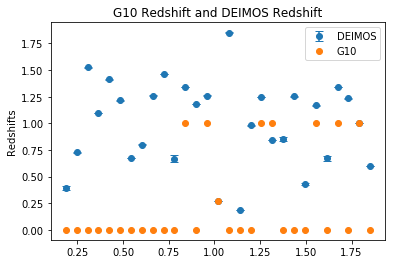

In [37]:
#Plotting redshifts to determine whether the different catalogues match up properly
x = np.linspace(min(T["ZTRUE"]), max(T["ZTRUE"]), len(T["ZTRUE"]))
plt.errorbar(x = x, y = T["ZTRUE"], yerr = T["ZERR"], fmt = 'o', capsize = 4, label = 'DEIMOS')
plt.errorbar(x = x, y = T_final["Z_06"], fmt = 'o', capsize = 4, label = 'G10')
plt.title("G10 Redshift and DEIMOS Redshift")
plt.ylabel("Redshifts")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'vUDS Redshift')

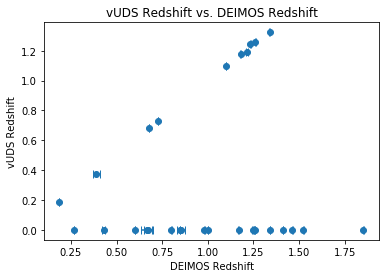

In [38]:
#vUDS z at 0 indicates that the galaxy is not present in the vUDS catalogue
plt.errorbar(y = T_final["z_spec"], x = T["ZTRUE"], xerr = T["ZERR"], fmt = 'o', capsize = 4)
plt.title("vUDS Redshift vs. DEIMOS Redshift")
plt.xlabel("DEIMOS Redshift")
plt.ylabel("vUDS Redshift")

Text(0, 0.5, 'DEIMOS redshift - vUDS redshift')

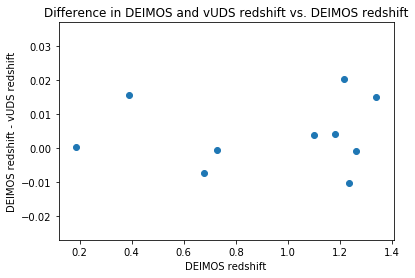

In [39]:
diff = []
x_axis = []
err = []
for x in range(0, len(T_final["z_spec"])):
    if T_final["z_spec"][x] != 0:
        diff.append(T_final["ZTRUE"][x] - T_final["z_spec"][x])
        x_axis.append(T_final["ZTRUE"][x])
        err.append(T_final["ZERR"][x])

plt.scatter(x_axis, diff)
plt.title("Difference in DEIMOS and vUDS redshift vs. DEIMOS redshift")
plt.xlabel("DEIMOS redshift")
plt.ylabel("DEIMOS redshift - vUDS redshift")